# This is the Main Bayes Model  with Lemma and n-gram to track performance improvement

In [4]:
# Import libraries
import pandas as pd
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:

# Download stopwords from nltk
nltk.download('stopwords')

# Load dataset
# Try loading the file with tab delimiter
df = pd.read_csv('training_data_lowercase.csv', sep='\t',header=None, names=['label', 'text'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:

# Check and clean dataset
df.dropna(subset=['text', 'label'], inplace=True)

# Preprocess text (lowercasing, removing punctuation, and stopwords)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    #stop_words = set(stopwords.words('spanish'))  # Assuming Spanish text
    stop_words = set(stopwords.words('english'))  # English text
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['text'].apply(preprocess_text)


In [11]:
print(df['cleaned_text'])
df['cleaned_text'].shape

0        donald trump sends embarrassing new years eve ...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obamas name coded website ...
4        pope francis called donald trump christmas speech
                               ...                        
34147           tears rain thais gather late kings funeral
34148    pyongyang university needs nonus teachers trav...
34149    philippine president duterte visit japan ahead...
34150            japans abe may election many dont want pm
34151    demoralized divided inside catalonias police f...
Name: cleaned_text, Length: 34152, dtype: object


(34152,)

In [12]:
# LEMMATIZATION STEPS
# Download required NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional for better support
nltk.download('punkt')     # Tokenizer
nltk.download('averaged_perceptron_tagger')  # POS tagging to help lemmatization

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0]  # Get the first character of the POS tag
    tag_dict = {"J": wordnet.ADJ,   # Adjective
                "N": wordnet.NOUN,  # Noun
                "V": wordnet.VERB,  # Verb
                "R": wordnet.ADV}   # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to NOUN if no match
    
# Function to lemmatize text with POS tagging
def lemmatize_text(text):
    # Lemmatize each word in the text using the POS tags
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return lemmatized_text

# Lemmatizing the input DS
df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)

print(df['cleaned_text'])
df['cleaned_text'].shape


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\KK\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        donald trump sends embarrassing new year eve m...
1        drunk bragging trump staffer started russian c...
2        sheriff david clarke becomes internet joke thr...
3        trump obsessed even obamas name coded website ...
4        pope francis called donald trump christmas speech
                               ...                        
34147              tear rain thai gather late king funeral
34148    pyongyang university need nonus teacher travel...
34149    philippine president duterte visit japan ahead...
34150             japan abe may election many dont want pm
34151    demoralized divided inside catalonia police force
Name: cleaned_text, Length: 34152, dtype: object


(34152,)

In [13]:
# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=1000,ngram_range=(1,2))
X = tfidf.fit_transform(df['cleaned_text'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

Accuracy: 0.8955690025375757
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2643
           1       0.90      0.88      0.89      2480

    accuracy                           0.90      5123
   macro avg       0.90      0.90      0.90      5123
weighted avg       0.90      0.90      0.90      5123



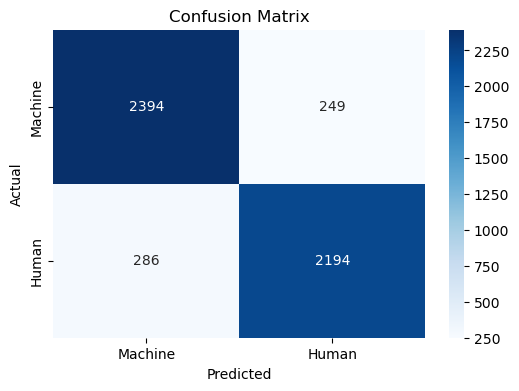

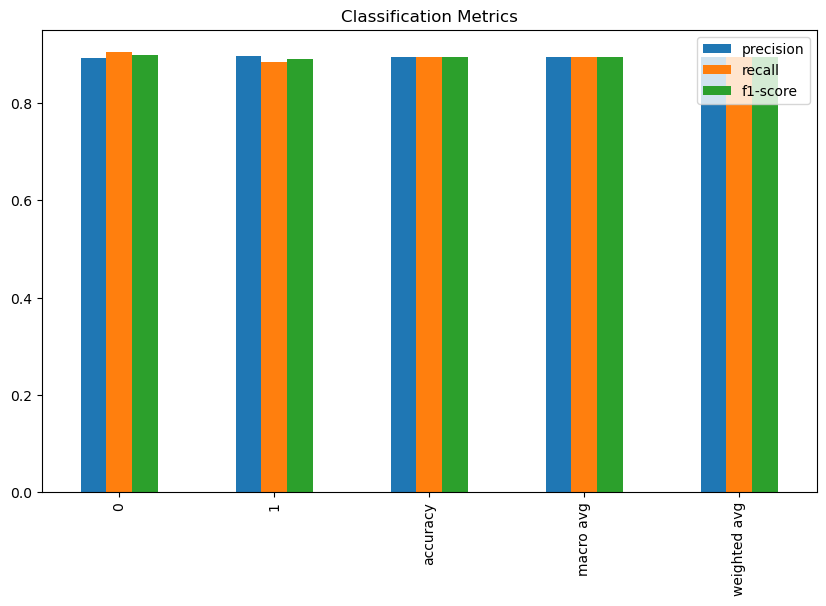

In [14]:

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Machine', 'Human'], yticklabels=['Machine', 'Human'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Metrics')
plt.show()

